# CS 109A/AC 209A/STAT 121A Data Science: Homework 1
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Tuesday, September 13th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW1.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid running your notebook on Vocareum and avoid changing your file after submitting.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#For solution ONLY
import matplotlib.cm as cmx
import matplotlib.colors as colors

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Zambalayev, Timur]

### Part (b): Course Number

[CSCI E-109a]

---

## Problem 1: Basic Data Visualization, Manipulation and Analysis

In this problem, we will be using some basic tools of data visualization and statistical analysis to help build our intuition for finding, describing and interpreting patterns in data. We will be working with the data contained in the file `dataset_HW1.txt`. The data in `dataset_HW1.txt` contains biometric readings for a number of diabetic patients. In this problem, we will try to detect disease subtypes within this set of patients using their biometric readings.

### Part (a): Understanding a Pandas Dataframe
Load the data from `dataset_HW1.txt` into a pandas dataframe. Get a basic picture of the information contained in the dataframe by printing the head, the size of the dataframe, the range of values in numeric-valued columns. Store the max, min and range information as a pandas dataframe.

<b>Solution:</b>

In [2]:
### Since I'm visualizing a dataframe I want to put this code and it's output 
### in it's own cell.

#read data into pandas df
df = pd.read_csv('dataset_HW1.txt')

#size of data frame
print 'number of patients:', df.shape[0]

#print first 5 rows of dataframe
df.head(n=5)

number of patients: 2300


,patient_id,marker_1,marker_2,subtype,patient_age,patient_gender
0,619681,21.640523,144.001572,0.0,3,female
1,619711,13.787380,162.408932,0.0,15,female
2,619595,22.675580,130.227221,0.0,6,female
3,619990,13.500884,138.486428,0.0,17,male
4,619157,2.967811,144.105985,0.0,6,female


In [3]:
### Since I'm visualizing another data frame with stats I want to put the 
### code as well as the output in its own cell

#choose columns 1, 2, 3, 4 (ignoring columns 0 and 5)
df_cols_1_to_4 = df[range(1, 5)] 

#get column names from important_column dataframe
column_names = df_cols_1_to_4.columns.values 

#create pandas dataframe with column names given by column_names
stats = pd.DataFrame(columns=column_names)

#create a row called 'max' and store max values from the columns of important_columns
stats.loc['max'] = df_cols_1_to_4.max()

#create a row called 'min' and store min values from the columns of important_columns
stats.loc['min'] = df_cols_1_to_4.min()

#create a row called 'range' and store range of values from the columns of important_columns
stats.loc['range'] = df_cols_1_to_4.max() - df_cols_1_to_4.min()
stats

,marker_1,marker_2,subtype,patient_age
max,80.209748,364.221777,3.0,90.0
min,-22.591722,-56.388949,0.0,3.0
range,102.801470,420.610725,3.0,87.0


### Part (b): Descriptive Statistics
Find the mean, median and standard deviation of the real-valued columns in the entire dataset. Now find the same set of descriptive statistics for each of the following subset of data:

1. children (ages 3 - 17)
2. adult males (ages 18 - 90)
3. adult females (ages 18 - 90)

Append these stats to the dataframe from part (a), containing the max, min and range. Explain what these stats say about the entire dataset as well as each of the above subsets.

Give a summary of the demographics of the patients contained in the dataset, i.e. how many children, how many adults, how many adult females and how many adult males. Display these results as pie charts.

**Solution:**

In [4]:
### Since I'm visualizing appending new stats to my dataframe with range, min and max
### I want to put the code as well as the output in its own cell

#choose columns 1, 2, 4 (ignoring columns 0, 3 and 4)
df_cols_1_2_4 = df[[1, 2, 4]] 

stats.loc['mean'] = df_cols_1_2_4.mean()
stats.loc['median'] = df_cols_1_2_4.median()
stats.loc['std'] = df_cols_1_2_4.std()
stats

,marker_1,marker_2,subtype,patient_age
max,80.209748,364.221777,3.0,90.000000
min,-22.591722,-56.388949,0.0,3.000000
range,102.801470,420.610725,3.0,87.000000
mean,31.970053,105.974247,NaN,38.868261
median,33.743705,105.179291,NaN,35.000000
std,18.096490,52.306201,NaN,27.211950


In [5]:
### New task new cell

#Create three different datasets by filtering our entire set
children_data = df[df['patient_age'] < 18]
adult_women_data = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')]
adult_male_data = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'male')]
    
#create dataframe with select column names (just like before)
column_names = children_data[range(1, 5)].columns.values
child_stats = pd.DataFrame(columns=column_names)

#add a row for each stat (just like before)
child_stats.loc['child_max'] = children_data[range(1, 5)].max()
child_stats.loc['child_min'] = children_data[range(1, 5)].min()
child_stats.loc['child_range'] = children_data[range(1, 5)].max() - children_data[range(1, 5)].min()

child_stats.loc['child_mean'] = children_data[[1, 2, 4]].mean()
child_stats.loc['child_median'] = children_data[[1, 2, 4]].median()
child_stats.loc['child_std'] = children_data[[1, 2, 4]].std()

child_stats

,marker_1,marker_2,subtype,patient_age
child_max,80.209748,171.429357,3.0,17.000000
child_min,-22.591722,70.538569,0.0,3.000000
child_range,102.801470,100.890788,3.0,14.000000
child_mean,26.267379,121.396907,NaN,10.106250
child_median,26.868357,121.799063,NaN,10.000000
child_std,24.972128,23.658433,NaN,4.307337


In [6]:
### New task new cell

#create dataframe with select column names (just like before)
column_names = adult_women_data[range(1, 5)].columns.values
adult_women_stats = pd.DataFrame(columns=column_names)

#add a row for each stat (just like before)
adult_women_stats.loc['adult_f_max'] = adult_women_data[range(1, 5)].max()
adult_women_stats.loc['adult_f_min'] = adult_women_data[range(1, 5)].min()
adult_women_stats.loc['adult_f_range'] = adult_women_data[range(1, 5)].max() - adult_women_data[range(1, 5)].min()

adult_women_stats.loc['adult_f_mean'] = adult_women_data[[1, 2, 4]].mean()
adult_women_stats.loc['adult_f_median'] = adult_women_data[[1, 2, 4]].median()
adult_women_stats.loc['adult_f_std'] = adult_women_data[[1, 2, 4]].std()
adult_women_stats

,marker_1,marker_2,subtype,patient_age
adult_f_max,59.702106,190.047718,1.0,90.000000
adult_f_min,28.364561,-43.386768,0.0,18.000000
adult_f_range,31.337545,233.434486,1.0,72.000000
adult_f_mean,44.053269,74.006378,NaN,54.613750
adult_f_median,43.911490,73.086403,NaN,56.000000
adult_f_std,7.141580,53.320292,NaN,21.094034


In [7]:
### New task new cell

#create dataframe with select column names (just like before)
column_names = adult_male_data[range(1, 5)].columns.values
adult_male_stats = pd.DataFrame(columns=column_names)

#add a row for each stat (just like before)
adult_male_stats.loc['adult_m_max'] = adult_male_data[range(1, 5)].max()
adult_male_stats.loc['adult_m_min'] = adult_male_data[range(1, 5)].min()
adult_male_stats.loc['adult_m_range'] = adult_male_data[range(1, 5)].max() - adult_male_data[range(1, 5)].min()

adult_male_stats.loc['adult_m_mean'] = adult_male_data[[1, 2, 4]].mean()
adult_male_stats.loc['adult_m_median'] = adult_male_data[[1, 2, 4]].median()
adult_male_stats.loc['adult_m_std'] = adult_male_data[[1, 2, 4]].std()
adult_male_stats

,marker_1,marker_2,subtype,patient_age
adult_m_max,40.458624,364.221777,2.0,90.000000
adult_m_min,1.860516,-56.388949,0.0,18.000000
adult_m_range,38.598108,420.610725,2.0,72.000000
adult_m_mean,24.678005,124.883059,NaN,53.744286
adult_m_median,26.168875,110.893774,NaN,54.000000
adult_m_std,6.956745,57.523807,NaN,21.295497


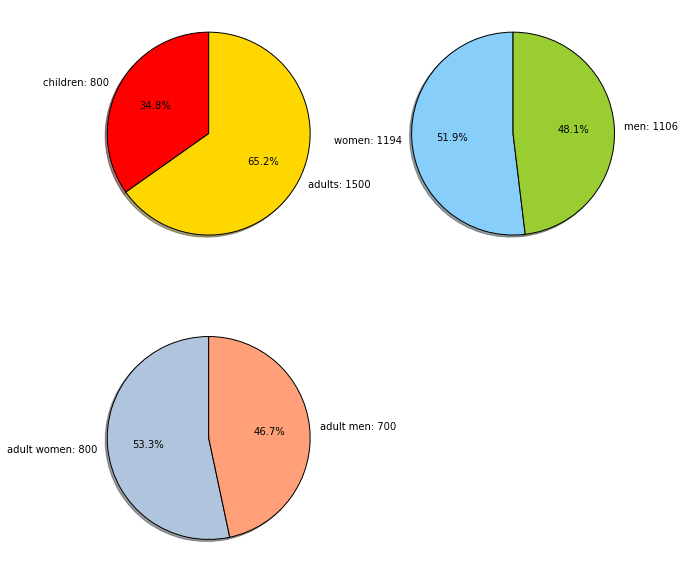

In [8]:
#children vs adults pie chart
children = children_data.shape[0] #number of kids
adults = df.shape[0] - children #adults = total number - kids

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(221)
ax1.pie([children, adults], 
        labels=['children: ' + str(children), 'adults: ' + str(adults)], 
        colors=['red', 'gold'],
        autopct='%1.1f%%', shadow=True, startangle=90)

#women vs men pie chart
women = df[df['patient_gender'] == 'female'].shape[0] #number of women
men = df.shape[0] - women #men = total number - women

ax2 = fig.add_subplot(222)
ax2.pie([women, men], 
        labels=['women: ' + str(women), 'men: ' + str(men)], 
        colors=['lightskyblue', 'yellowgreen'],
        autopct='%1.1f%%', shadow=True, startangle=90)

#adult women vs men pie chart
adult_women = adult_women_data.shape[0]
adult_men = adults - adult_women

ax3 = fig.add_subplot(223)
ax3.pie([adult_women, adult_men], 
        labels=['adult women: ' + str(adult_women), 'adult men: ' + str(adult_men)], 
        colors=['lightsteelblue', 'lightsalmon'],
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

### Part (c): Data Visualization
To understand how the biometric reading might help us determine diabetic subtypes, we begin with some visual analysis of the biometric data:

1. plot histograms of marker 1 and marker 2 (play with different values for the bin number to find the most useful
visualization)
2. plot both markers in a scatter plot, color each point according to disease subtype

Do the above for each demographics within the data: children, adult men and adult women.

**Solution:**

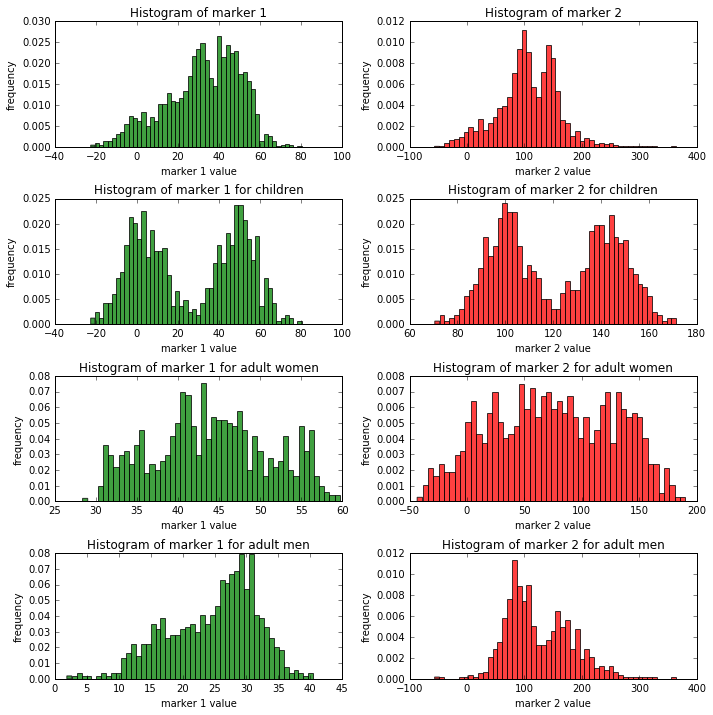

In [9]:
#function for plotting histograms
def plot_hist(data, title, x_label, face, axes):
    
    axes.hist(data, 
         50, 
         normed=1, 
         facecolor=face, 
         alpha=0.75)
    
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel('frequency')
    
    return axes
    
#plot histograms for each marker and each demographics
#in the following, instead of adding one subplot to a 4x2 grid at a time
#I can get all the subplot axes for the grid in one line 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(10, 10))
ax1 = plot_hist(df['marker_1'],
                'Histogram of marker 1', 
                'marker 1 value', 
                'green', 
                ax1)

ax2 = plot_hist(df['marker_2'],
                'Histogram of marker 2', 
                'marker 2 value', 
                'red', 
                ax2)

ax3 = plot_hist(children_data['marker_1'],
                'Histogram of marker 1 for children', 
                'marker 1 value', 
                'green', 
                ax3)

ax4 = plot_hist(children_data['marker_2'],
                'Histogram of marker 2 for children', 
                'marker 2 value', 
                'red', 
                ax4)

ax5 = plot_hist(adult_women_data['marker_1'],
                'Histogram of marker 1 for adult women', 
                'marker 1 value', 
                'green', 
                ax5)

ax6 = plot_hist(adult_women_data['marker_2'],
                'Histogram of marker 2 for adult women', 
                'marker 2 value', 
                'red', 
                ax6)

ax7 = plot_hist(adult_male_data['marker_1'],
                'Histogram of marker 1 for adult men', 
                'marker 1 value', 
                'green', 
                ax7)

ax8 = plot_hist(adult_male_data['marker_2'],
                'Histogram of marker 2 for adult men', 
                'marker 2 value', 
                'red', 
                ax8)

plt.tight_layout()
plt.show()

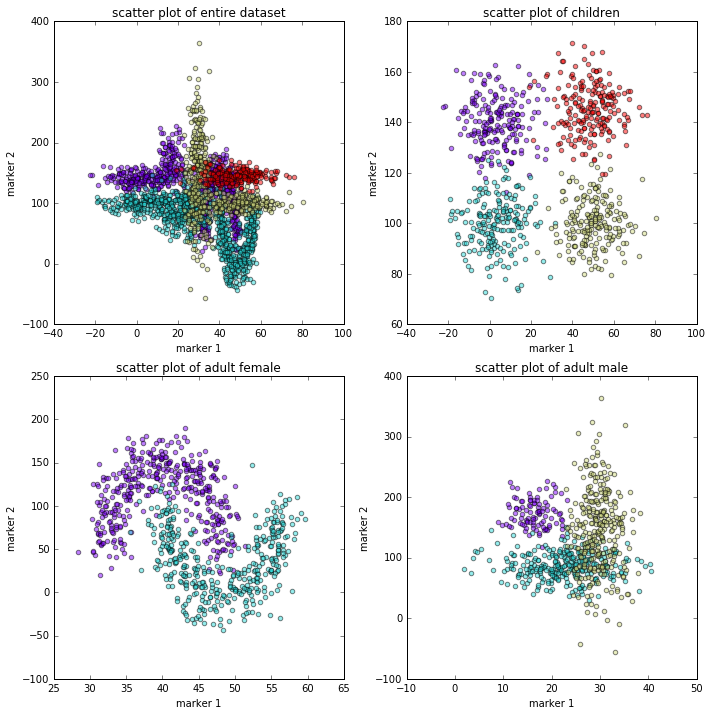

In [10]:
def plot_scatter(data, plot_title, x_lable, y_lable, groups, axes):
    #set up color map (one color per group number)
    
    #split [0, 1] in to as many parts as there are groups
    group_numbers = np.linspace(0, 1, groups) 
    #get a color map
    c_map = plt.get_cmap('rainbow') 
    #get a range of colors from color map
    c_norm  = colors.Normalize(vmin=0, vmax=group_numbers[-1])
    #get a map that maps a group number to a color
    number_map = cmx.ScalarMappable(norm=c_norm, cmap=c_map)
    
    #plot points colored by their group number
    for group in xrange(groups):
        #convert a group number into a color using our map
        color = number_map.to_rgba(group_numbers[group])
        #make a scatter plot of a specific group colored by its group number color
        axes.scatter(data[data['subtype'] == group]['marker_1'], 
                     data[data['subtype'] == group]['marker_2'], 
                     c=color, 
                     alpha = 0.5)

    axes.set_title(plot_title) 
    axes.set_xlabel(x_lable)
    axes.set_ylabel(y_lable)
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

plot_scatter(df, 'scatter plot of entire dataset', 'marker 1', 'marker 2', 4, ax1)  
plot_scatter(children_data, 
             'scatter plot of children', 
             'marker 1', 'marker 2', 
             4,
             ax2)  
plot_scatter(adult_women_data, 
             'scatter plot of adult female', 
             'marker 1', 
             'marker 2', 
             4, 
             ax3)  
plot_scatter(adult_male_data, 
             'scatter plot of adult male', 
             'marker 1', 
             'marker 2', 
             4, 
             ax4) 

plt.tight_layout()
plt.show()

### Part (d): Putting it All Together

Summarize and interpret the patterns in the **histograms** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric data (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Summarize and interpret the patterns in the **scatter plots** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric readings (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Do your analyses of the patterns in histograms and the scatter plots support or contradict each other? Is one of the two visualizations more useful than the other for anlyzing the relationship between biometric data and disease subtypes? If so which, and why?

Compare the descriptive stats you computed in part (b) with the visualizations. Which aspects of the visualizations (histogram and scatter plots) does each statistic measure? 

Do the stats support, contradict or enhance your visual analysis of the biometric data? 

Finally, what can you conclude, based on your visual analysis and stats, about the relationship between biometric data and diabetic subtypes in this pool of patients?

**Solution:**

***Histograms***

The patterns in the histograms tell us that for different population groups (children, adult females and adult males) we have distinctly different distributions for biometric data (marker 1 and marker 2).

For children we have bimodal distributions with two quite prominent peaks (for both markers).

For adult men for both markers we can see a prominent peak.

For adult women we have fatter tails and no prominent peaks.

***Scatter plots***

Scatter plots tell us that different population groups have different number of disease subtypes. Children have four different disease subtypes, adult women - two, adult men - three.

When we look at scatter plot of the entire dataset, we can see that different disease subtypes form distinct clusters with some overlapping. If we look further at specific population groups, we see these clusters become even more distinct and are eaiser to classify. 

The children scatter plot has four clusters that can be separated by linear borders. 

The adult women scatter plot has two distint clusters. The possible Bayes decision boundary between them will be non-linear.

For adult men we can see that there is one distinct cluster and there are two with some overlapping.

We can also note that the spread is different for different population groups. You can see it by noticing differences in ranges in axes for the scatter plots.

***Two visualizations***

Histograms and scatter plots support each other. Both plot types give different perspectives for the same data. 
For analyzing the relationship between the biometric readings and disease subtypes scatter plots are more useful because they illustrate the relationship and histograms don't. On scatter plots we can see geometric forms of the cluster (with marker 1 points on the x axis and marker 2 points on the y axis and with different disease subtypes marked by different colors). The histograms don't have disease subtype information. They show only individual marker distributions.

***Descriptive stats***

Min and max tell us about the extreme points on the plot scale. The min (max) value where the leftmost (rightmost) bin is on the histogram.

The range tells us the size of the plot scale.

The mean and the median point to the center of the distribution on the plot scale.

The standard deviation tell us about typical spread around the center of the distribution on the plot scale.

In histograms we have just one scale. And for scatter plots we talk about one particular axis scale depending on the marker.

The stats support our visual analysis of the biometric data.

***Conclusions***

We can say that we have different patterns for different demographics groups. So if we have biometric data (marker 1 and 2) it's not enough to try to classify possible disease subtype. It's important to know the age and gender of the patient. It seems that the age and gender can significantly help in the accuracy of the classification of the disease subtype.

---

## Problem 2: Introduction to Classification

In this problem, we will use your analysis of the relationship between biometric data and diabetic subtypes from Problem 1 to **classify** the disease subtype of new patients.

### Part (a): A Disease Subtype Classifier for Children

In the pool of child patients, compute the mean biometric data (marker 1 and marker 2) for each diabetic subtype. For a new patient between the ages of 3 and 18, we will classify the patient as the subtype whose biometric mean is most ``similar" to the patient's biometric data.

- Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

To evaluate our classifier, we can use it to classify a set of new patients whose disease subtype we already know. We measure the quality of our classifier by compute the percentage of new patients whose disease subtype we correctly classify. 

- Explain why the percentage of correct classification is a reasonable way to evaluate our classifier. What might be some shortcomings or ambiguities of this method of evaluation (**Hint:** think about the effect of the number of patients in each disease subtype, confidence level etc).

**Solution:**

In [11]:
print 'mean biometric data for children (by disease subtype):'

marker_columns = [1, 2]
subtype = children_data['subtype']

for i in range(4):
    mean_df = children_data[subtype == i][marker_columns].mean()
    print 'subtype %d, marker_1: %5.2f, marker_2: %6.2f' % (i, mean_df['marker_1'], mean_df['marker_2'])


mean biometric data for children (by disease subtype):
subtype 0, marker_1:  3.28, marker_2: 140.15
subtype 1, marker_1:  3.33, marker_2:  99.70
subtype 2, marker_1: 49.94, marker_2: 100.20
subtype 3, marker_1: 48.52, marker_2: 145.54


***Why this way of classifying is reasonable***

If we look at the scatter plot of children from Part (c), we can see four clusters and it looks like the more closer the point to the center of this cluster, the more likely this point to belong to this cluster.

***Evaluation of the classifier***

It's reasonable because we are interested in the correct classifying of the disease subtypes and so the higher percentage of the patients classified correctly, the better.

The potential shortcoming of this method could be that it can be less efficient for the rarer disease subtypes. Overall we could have high success rate but for less frequent disease subtypes it could be less accurate.

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%). 

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and testing data (representing new patients), which then:

    1. computes the biometric means for subtypes using the training data 
    2. classifies the disease subtype of each new patient by comparing their biometric data to the means you've computed (i.e. compute the Euclidean distance between a new patient's biometric data and the biometric means of each disease subtype, classify the new patient as the subtype whose means is most similar in term of the Euclidean distance)


- Write a function, `evaluate`, that takes as input the actual disease subtypes for a set of patients as well as the predicted disease subtypes and computes the percentage of new patients who are correctly classified.

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

**Solution:**

In [12]:
import math
from itertools import izip
from operator import itemgetter


def compute_means(df):
    marker_columns = [1, 2]
    subtype = df['subtype']

    column_names = df[marker_columns].columns.values
    means = pd.DataFrame(columns=column_names)

    for st in range(4):
        means.loc[st] = df[subtype == st][marker_columns].mean()

    return means


def distance(marker1, marker2, m1_mean, m2_mean):
    sq1 = (marker1 - m1_mean) ** 2
    sq2 = (marker2 - m2_mean) ** 2
    return math.sqrt(sq1 + sq2)


def classify_markers(marker1, marker2, means):
    index_distance_pairs = ((index, distance(marker1, marker2, row['marker_1'], row['marker_2']))
                            for index, row in means.iterrows())
    min_index, _ = min(index_distance_pairs, key=itemgetter(1))
    return min_index


def classify_row(row, means):
    return classify_markers(row['marker_1'], row['marker_2'], means)


def classify_df(df, means):
    return (classify_row(row, means) for index, row in df.iterrows())


def classify(train, test):
    predicted_disease_subtypes = classify_df(test, compute_means(train))
    return predicted_disease_subtypes


def evaluate(actual_disease_subtypes, predicted_disease_subtypes):
    correct_count = 0
    total_count = 0
    for actual, predicted in izip(actual_disease_subtypes, predicted_disease_subtypes):
        correct_count += actual == predicted
        total_count += 1
    correct_percentage = float(correct_count) / total_count
    return correct_percentage


def split(df):
    test_size = 0.3
    length = len(df)

    indices = list(df.index)
    np.random.shuffle(indices)

    test_length = int(round(test_size * length))
    test_indices = indices[:test_length]
    train_indices = indices[test_length:]

    test = df.loc[test_indices]
    train = df.loc[train_indices]

    return train, test


def evaluate_df(df):
    train, test = split(df)
    predicted_disease_subtypes = classify(train, test)
    actual_disease_subtypes = (row['subtype'] for index, row in test.iterrows())
    correct_percentage = evaluate(actual_disease_subtypes, predicted_disease_subtypes)
    return correct_percentage


def evaluate_and_print(df, population_group_id):
    correct_percentage = evaluate_df(df)
    print 'percentage of the new patients who are correctly classified (%s): %.1f%%' % (
        population_group_id, 100.0 * correct_percentage)


np.random.seed(1090)

evaluate_and_print(children_data, 'children')

percentage of the new patients who are correctly classified (children): 96.2%


### Part (c): Further Evaluation of Our Classifier

- Create training and testing sets from the adult female patients. Use the `classify` function from Part (b) to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

- Do the same for adult male patients.

- Is our method of classifying disease subtypes valid for adult male and adult female patients (use the returned values of the `evaluate` function to support your explanation)? 

- Explain why our method of classifying disease subtypes is or is not valid for adult data. 

**Solution:**

In [13]:
np.random.seed(1091)

evaluate_and_print(adult_women_data, 'adult women')
evaluate_and_print(adult_male_data, 'adult men')

percentage of the new patients who are correctly classified (adult women): 83.8%
percentage of the new patients who are correctly classified (adult men): 61.4%


***Is our method of classifying valid for adult male and adult female patients?***

No, our method of classifying disease subtypes is worse for adult women (79-86%) and significantly worse for adult men (58-65%) than children (96-99%).

***Why?***

That's because these population groups have different geometric shapes for their clusters of different disease subtypes. We can see it in our scatter plots from Problem 1 Part (c). Our method works best when there are distinct non-overlapping clusters and when points gather around their central point which is the case for the children data. 

With the adult women data we have more complex non-linear Bayes decision boundaries. The adult men data has overlapping clusters.

## Problem 3: More Classification

In this problem, we will explore a different way to classify the disease subtype of new patients.

### Part (a): Another Classifier

In Problem 2, we classified the disease subtype of a new patient by comparing their biometric data with the biometric means of the subtypes we compute from the training data. This time, we compare the biometric data of the new patient with the data of all the patients in the training data. We identify the patient in the training data whose biometric data is most similar (in terms of Euclidean distance) to that of the new patient. Finally, we classify the disease subtype of the new patient as that of the patient most similar to them.

Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

**Solution:**

***Why this way of classifying is reasonable***

This method works when points of the same subtype cluster together with no other subtype points around. This is true for children and adult women data (scatter plots from Problem 1 Part (c)). It will also work for some parts of the adult men data except for the overlapping area.

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%).  

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and data for new patients, which then:

    1. for each new patient, identify the patient in the training set whose biometric data is the most similar to this patient 
    2. classifies the disease subtype of each new patient as the subtype of the patient most similar to them
    

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function, from Problem 2, to evaluate your classification.

- Do the same for adult male and adult female data.

**Solution:**

In [14]:
def classify_markers_prob3(marker1, marker2, train):
    # we iterate over the rows of the train dataframe and get the pairs: (subtype, distance)
    subtype_distance_pairs = ((row['subtype'], distance(marker1, marker2, row['marker_1'], row['marker_2']))
                              for index, row in train.iterrows())
    # find the pair with the minimum distance
    min_subtype, _ = min(subtype_distance_pairs, key=itemgetter(1))
    # return its subtype
    return min_subtype


def classify_row_prob3(row, train):
    return classify_markers_prob3(row['marker_1'], row['marker_2'], train)


def classify_prob3(train, test):
    return (classify_row_prob3(row, train) for index, row in test.iterrows())


def evaluate_df_prob3(df):
    train, test = split(df)
    predicted_disease_subtypes = classify_prob3(train, test)
    actual_disease_subtypes = (row['subtype'] for index, row in test.iterrows())
    correct_percentage = evaluate(actual_disease_subtypes, predicted_disease_subtypes)
    return correct_percentage


def evaluate_and_print_prob3(df, population_group_id):
    correct_percentage = evaluate_df_prob3(df)
    print 'percentage of the new patients who are correctly classified (%s): %.1f%%' % (
        population_group_id, 100.0 * correct_percentage)


np.random.seed(1092)
    
evaluate_and_print_prob3(children_data, 'children')
evaluate_and_print_prob3(adult_women_data, 'adult women')
evaluate_and_print_prob3(adult_male_data, 'adult men')

percentage of the new patients who are correctly classified (children): 95.8%
percentage of the new patients who are correctly classified (adult women): 95.8%
percentage of the new patients who are correctly classified (adult men): 85.2%


### Part (c): Comparison of Classifiers

Compare the performance of the classifier you implemented in Part (b) with the one from Problem 2.

Which classifier does a better job on the child patient data? Explain why, using your analysis of the dataset from Problem 1. 

Answer the above question for the adult male and adult female data.

**Solution:**

***Performance of the classifier (vs problem 2)***

The performance of this classifier is about the same on the children data: 96-98% vs 96-99% (problem 2 classifier).
For the adult women data the performance got much better: 95-98% vs 79-86%.
The same can be said for the adult men data: 78-85% vs 58-65%.

***Which classifier does a better job?***

For the children data both classifiers are quite good and post similar results. Here we have four different non-overlapping clusters and in this case both classifiers do a good job. Since the problem 3 classifier is much slower, we could say that overall the problem 2 classifier is a better choice for the children data.

For the adult women data the problem 3 classifier is much better because of the non-linear form of the clusters. The points don't gather around one central point which is the ideal scenario of the problem 2 classifier. They still cluster in such a way that locally we have predominantly one class of points for which the problem 3 classifier works well.

For the adult men data the problem 3 classifier is better because there is non-linearity of the clusters (problem 3 classifier is better in this case), the centers of the clusters are close to each other and there are some local clusters (it's to the advantage of problem 3 classifier).

---

## Challenge Problem: US Voting Data (by Age and Sex)
**(Required for AC 209A Students)**

In this problem, you will perform preliminary data exploration and visualization of some real voting data. 

**Note:** You are now working with real-life data, so be cautious regarding data type, data format and data quality.

### Part (a): Downloading and Understanding the Data

Download Table 1 from the [US Census Bereau](http://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-577.html). This is an excel file (do not perform any analysis using Microsoft Excel). 

Load the data into a Python data structure.

Write a brief summary describing what information is included in this dataset (provide evidence to support your summary).

**Solution:**

In [28]:
def get_gender_label_list(index_values):
    current_label = ''
    gender_labels = ['Both sexes', 'Male', 'Female', '']
    index = 0
    gender_label_list = []
    for v in index_values:
        if v == gender_labels[index]:
            current_label = gender_labels[index]
            index += 1
        gender_label_list.append(current_label)
    return gender_label_list


def clean_column_value(s):
    return '' if s.startswith('Unnamed: ') else s


def concat_column_values(v1, v2):
    return v1 + ' - ' + v2 if v2 else v1


def get_column_label_list(values):
    str_list = []
    for v in values:
        v0 = v[0]
        v1 = clean_column_value(v[1])
        v2 = clean_column_value(v[2])
        s = concat_column_values(v0, v1)
        s = concat_column_values(s, v2)
        str_list.append(s)
    return str_list


def get_indices_to_drop():
    ind_list = []
    for j in range(3):
        st = j * 76
        ind_list.extend(range(st + 0, st + 11))
        if j < 2:
            ind_list.extend([st + 75])
    return ind_list


def get_age_list():
    ind_list = []
    ind_list.extend(range(18, 81))
    ind_list.append(85)
    return ind_list


def read_excel():
    df = pd.read_excel('table01.xls', skiprows=3, skip_footer=5, header=[0, 1, 2], index_col=0)

    # create simple column names instead of multi-level ones
    df.columns = get_column_label_list(df.columns.values)

    # we drop the columns that we are not interested in
    df = df.drop(df.columns[[4, 5, 6, 7, 10, 11, 12, 13]], axis=1)

    # create the gender column so that later we can create an index with the gender component
    gender_label_list = get_gender_label_list(df.index.values)
    df.insert(0, 'gender', gender_label_list)

    # create a separate 'total' dataframe
    total_df = df.iloc[[2, 78, 154]]
    total_df = total_df.set_index(['gender'])

    # drop all rows except for the individual age ones
    indices_to_drop = get_indices_to_drop()
    age_df = df.drop(df.index[indices_to_drop])

    # create the age column
    age_list = 3 * get_age_list()
    age_df.insert(1, 'age', age_list)

    # create ('gender', 'age') multi index for the main dataframe
    age_df = age_df.set_index(['gender', 'age'])

    return age_df, total_df


age_df, total_df = read_excel()
print 'total dataframe:\n%s\n' % total_df
print 'age dataframe:\n%s\n' % age_df.head()
print 'age dataframe (female):\n%s\n' % age_df.loc['Female'].head()

total dataframe:
            Total Population  US Citizen - Total Citizen Population  \
gender                                                                
Both sexes          239874.0                               219941.0   
Male                115637.0                               105299.0   
Female              124237.0                               114642.0   

            US Citizen - Reported registered - Number  \
gender                                                  
Both sexes                                   142166.0   
Male                                          66147.0   
Female                                        76019.0   

            US Citizen - Reported registered - Percent  \
gender                                                   
Both sexes                                        64.6   
Male                                              62.8   
Female                                            66.3   

            US Citizen - Reported voted - Number  

***Brief summary***

In the index we can see three sections ('Both sexes', 'Male', 'Female') that represent three different sets of rows with the same set of age-related headers.

In the original column headers we have three levels. The first is some grouping: 'US Citizen', 'Total Population'. The second represents various variables: 'Reported registered', 'Reported voted', etc. The third one is the type of the variable. It's either population counts ('Number') or percentages ('Percent').

So we have voter registration ('Reported registered', 'Reported not registered', 'No response to registration') and voting ('Reported voted', 'Reported did not vote', 'No response to voting') information for the United States by age (for different age groups and individual ages) and sex ('Both sexes', 'Male', 'Female') grouped by US citizen population and total population (only 'Reported registered' and 'Reported voted' variables).

### Part (b): What's the Story?

Perform data exploration and identify as well as describe the major trends in this data set. Use your computations and visualizations effecitively and specifically to support your analysis, hypothesis and conclusions. Your analysis must include relationships between age, sex and reported percentage of voter registration, reported voting.

**Solution:**

First let's look at the reported percentages of voter registration and reported voting for all citizens and by gender.

In [20]:
total_df.loc[:][['US Citizen - Reported registered - Percent', 'US Citizen - Reported voted - Percent']]

,US Citizen - Reported registered - Percent,US Citizen - Reported voted - Percent
gender,,
Both sexes,64.6,41.9
Male,62.8,40.8
Female,66.3,43.0


We can see that overall 64.6% of US citizens reported registered for voting and 41.9% of the citizens reported voted.
Men are less active than women (62.8% vs 66.3 - reported registered, 40.8% vs 43.0% - reported voted).

Now let's have a look of what's going on we look at the invidual age groups.

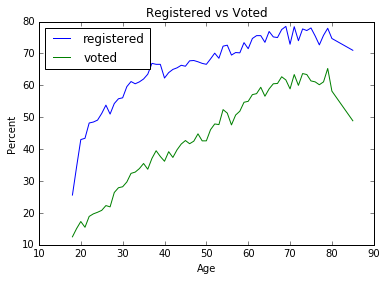

In [37]:
def show_plot(title, plot_info_1, plot_info_2, ylabel):
    plt.plot(plot_info_1[0], label=plot_info_1[1])
    plt.plot(plot_info_2[0], label=plot_info_2[1])
    plt.xlabel('Age')
    plt.ylabel(ylabel)
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()


def show_percent_plot(title, plot_info_1, plot_info_2):
    show_plot(title, plot_info_1, plot_info_2, 'Percent')


def show_number_plot(title, plot_info_1, plot_info_2):
    show_plot(title, plot_info_1, plot_info_2, 'Population')

    
show_percent_plot(
    'Registered vs Voted',
    (age_df.loc['Both sexes'][['US Citizen - Reported registered - Percent']], 'registered'),
    (age_df.loc['Both sexes'][['US Citizen - Reported voted - Percent']], 'voted'))


We see that both reported voter registration and reported voted percentages are quite low the younger population, then they go up with age peaking at age 70-78 and then go down for the oldest age groups.

We can notice that voter participation ("reported voted") grows linearly with age (18 to 70). Voter registration grows quickly from the age of 18 to 30 and then the rate of growth slows down.

Now let's see at the voter registration data by gender.

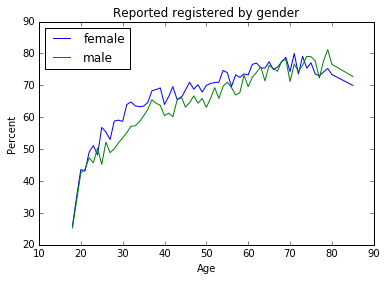

In [38]:
show_percent_plot(
    'Reported registered by gender',
    (age_df.loc['Female'][['US Citizen - Reported registered - Percent']], 'female'),
    (age_df.loc['Male'][['US Citizen - Reported registered - Percent']], 'male'))

We can see that for age 18-22 both genders show about the same level of the voter registration. Then women are more active up to the ages of 70-75. Then men become a more active group.

Let's have a look at the reported voted numbers for each sex.

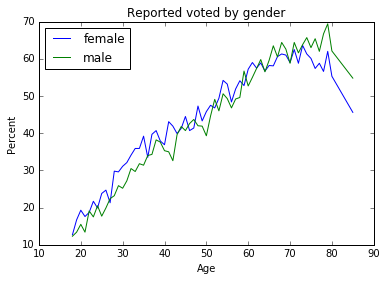

In [39]:
show_percent_plot(
    'Reported voted by gender',
    (age_df.loc['Female'][['US Citizen - Reported voted - Percent']], 'female'),
    (age_df.loc['Male'][['US Citizen - Reported voted - Percent']], 'male'))

Here we have similar number of both genders with women being a little bit more active in voting (ages 18 to 75). Then as with voter registration men become more active (ages 75 and older).

Now let us examine the same data but for the population counts. This way we could see a different picture because the age distribution is not uniform. There are more baby boomers than representatives of any other age cohort. We can see which age group is more influential in the elections.

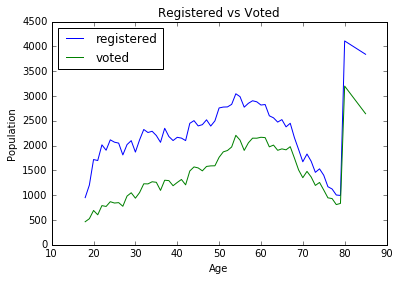

In [40]:
show_number_plot(
    'Registered vs Voted',
    (age_df.loc['Both sexes'][['US Citizen - Reported registered - Number']], 'registered'),
    (age_df.loc['Both sexes'][['US Citizen - Reported voted - Number']], 'voted'))

First of all the fluke at the end is because the last two age groups are not individual age groups ("80-84", "85 and over").

The age group 50-60 is the most influential in the elections (peak for the voted variable). 

Now it will be interesting to see the age distribution.

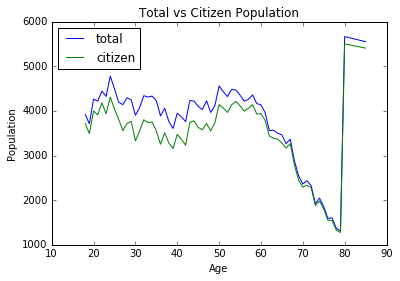

In [41]:
show_number_plot(
    'Total vs Citizen Population',
    (age_df.loc['Both sexes'][['Total Population']], 'total'),
    (age_df.loc['Both sexes'][['US Citizen - Total Citizen Population']], 'citizen'))

We can see that it's pretty much the same up to the age of 60 with two peaks (ages around 25 and 50-60). The population counts go down quickly after the age of 60.

Considering these data, we can see that active participation in voting helps older generations in turning out for the elections in relatively greater numbers.

Before we look at the population gender data. Let's look at the distribution by gender by age.

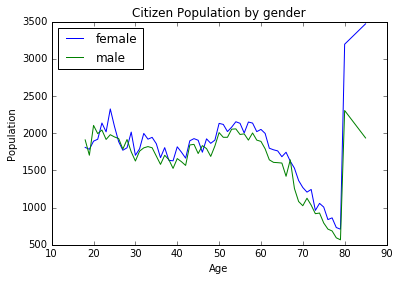

In [43]:
show_number_plot(
    'Citizen Population by gender',
    (age_df.loc['Female'][['US Citizen - Total Citizen Population']], 'female'),
    (age_df.loc['Male'][['US Citizen - Total Citizen Population']], 'male'))

We can see that for most age groups there are more women than men.

Now let's see the voting data by gender.

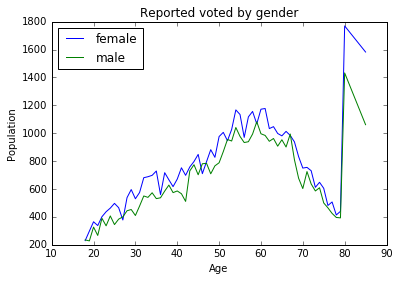

In [45]:
show_number_plot(
    'Reported voted by gender',
    (age_df.loc['Female'][['US Citizen - Reported voted - Number']], 'female'),
    (age_df.loc['Male'][['US Citizen - Reported voted - Number']], 'male'))

Slight edge in population counts and voter participation translates into more active voter participation for women.

### Part (c): What's Next?

Based on your analysis in part (c), what types of interesting questions or tasks could you ask of or perform with this data (explain your answer)? What additional data do you anticipate needing in order to answer these questions/perform these tasks (explain your answer)?

**Solution:**

* We can analyze these data by state and see if these patterns are about the same in different states.
* We can analyze these data by other dimensions, such as race, party affilation.
* We can analyze if more active (or less active) participation for different age groups translates into more power with regards to questions important to that age group (e.g. Social Security, Medicare).
* We can have a look at other years and see if there are changes in patterns.